$\newcommand{\goth}[1]{\mathcal{#1}}\newcommand{\set}[1]{\mathbb{#1}}\newcommand{\nn}{\set{N}}\newcommand{\zz}{\set{Z}}\newcommand{\qq}{\set{Q}}\newcommand{\cc}{\set{C}}\newcommand{\pp}{\set{P}}$
# Walks in the Quarter Plane in Sage
## The package $\text{comb_walks}$

### 1. Introduction to walks in the plane

A _walk_ in the lattice $\zz^2$ is a sequence of points $(P_0,\ldots,P_n)$. We
say that $P_0$ is the _origin_ of the walk and $P_n$ is its _ending point_, 
that $n$ is its length and that all the differences $s_i = P_{i} - P_{i-1} \in \zz^2$ for $1 \leq n$ are its _steps_.

Given a set $\goth{S} \subset \zz^2$ whose elements we call _valid steps_, we can consider walks in
the lattice plane that only have steps in such subset, i.e., walks where
$s_i \in \goth{S}$ for all $1 \leq i \leq n$.
We call the resulting set of walks a _model_ of walks.

The following combinatorial problem was considered:
* **Walks on the plane:** given a set $\goth{S} \subset \{-1,0,1\}^2\setminus \{(0,0)\}$ (which are 
  called _small steps_), how many walks are there from the origin $(0,0)$ to the 
  point $(i,j)$ using $n$ steps taken from $\goth{S}$?
  
To study this problem, we collect the numbers $g_{i,j,n}$ in a generating series:
$$G(x,y,t) = \sum_{i,j\in\zz}\sum_{n\in\nn} g_{i,j,n}x^iy^jt^n.$$

The classification of different models according to the algebraic and differential nature of the function $G(x,y,t)$ is done by using the recurrence relation
$$g_{i,j,n} = \sum_{(a,b)\in \goth{S}} g_{(i-a), (j-b), (n-1)},$$
which holds for all different models. Moreover, for each $(a,b) \in \zz^2$ we have
$$\begin{array}{rcl}
    tx^ay^b G(x,y,t) & = & \sum_{i,j\in\zz}\sum_{n\in\nn}g_{i,j,n}x^{i+a}y^{j+b}t^{n+1}\\
                     & = & \sum_{i,j\in\zz}\sum_{n\geq 1}g_{(i-a),(j-b),(n+1)}x^iy^jt^n .
\end{array}$$

Now, if we sum the left-hand sides of the previous equation over all $(a,b) \in \goth{S}$, we can simplify the right-hand side using the recurrence equation. This leads to the following equation:
$$G(x,y,t) = \frac{1}{1-tS(x,y)},$$
where $S(x,y)$ is the so-called _step polynomial_ of the model $\goth{S}$ and it is defined as follows:
$$S(x,y) = \sum_{(i,j) \in \goth{S}} x^i y^j.$$

So studying the nature of the generating function for these models was pretty trivial: all models have a rational generating function.

Now we consider a slightly different problem:
* **Walks in the Quarter Plane:** given a set $\goth{S} \subset \{-1,0,1\}^2\setminus \{(0,0)\}$ of valid steps, how many walks are then from
  the origin $(0,0)$ to the point $(i,j) \in \nn^2$ using $n$ steps taken from $\goth{S}$ that **never cross** any axis?
  
This is exactly the same problem as before, but now we _restrict_ the type of valid walks excluding those that cross the X or Y axis. Again, let $q_{i,j,n}$ be the answer to that question, and consider the generating function:

$$Q(x,y,t) = \sum_{i,j,n \in \nn}q_{i,j,n}x^iy^jt^n.$$

Can we classify these generating function again using their algebraic and differential properties? In this case, we need to consider the _kernel function_:
$$K(x,y) = xy(1-tS(x,y)) \in \zz[x,y,t],$$
and another functional equation pops up:
$$Q(x,y,t)K(x,y,t) = xy - Q(0,0,t)K(0,0,t) + Q(x,0,t)K(x,0,t) + Q(0,y,t)K(0,y,t).$$

From this equation, the models with small steps have been classified between:
* Rational models: the function $Q(x,y,t)$ is a rational function.
* Algebraic models: the function $Q(x,y,t)$ is an algebraic function, i.e., there is a polynomial $P(z) \in \qq[x,y,t][z]$ such that $P(Q(x,y,t)) = 0$.
* D-finite models: the function $Q(x,y,t)$ satisfies a linear differential equation w.r.t $\partial_x, \partial_y$ and $\partial_t$.
* D-algebraic models: the function $Q(x,y,t)$ satisfies a non-linear differential equation w.r.t. $\partial_x, \partial_y$ or $\partial_t$.
* D-transcendental: other cases.

### 2. Installation and usage of the package

The package $\text{comb_walks}$ presented in this demo allows the user to study any
model by providing the valid set of steps.
The user is then able to check out the different objects
that are used to study the generating function $Q(x,y,t)$ described in the previous section
to count the number of walks in the quarter plane.

The package has been developed (and it is still increasing its functionality) in the framework
of the collaboration between [Johannes Kepler University](https://www.dk-compmath.jku.at/) (partially
funded by the Austrian Science Fund (FWF): W1214-N15, project DK15) and the Inria group [Specfun](https://specfun.inria.fr/)
(also supported in part by the ANR [DeRerumNatura](https://specfun.inria.fr/chyzak/DeRerumNatura/) project, grant ANR-19-CE40-0018 of the French _Agence Nationale de la Recherche_).

The package is currently hosted in [GitLab Inria](https://gitlab.inria.fr/) in a [public repository](https://gitlab.inria.fr/discretewalks/comb_walks). This package can be freely cloned using https protocol using any kind of _git_ client, and it can also be directly installed via Sage _pip_ command:

``sage -pip [--user] install git+https://gitlab.inria.fr/discretewalks/comb_walks.git``

Once the user has it installed in their system, the package can be loaded into Sage with the usual ``import`` statement: 

In [1]:
from comb_walks import *
dlogging.logging.getLogger().setLevel(dlogging.ERROR) # Just printing the Error messages
%display latex

##### Remarks on the implementation

* The current implementation will only work with Sage 9.0 or higher, since it is written in Python3. Compatibility with previous versions will not be pursued. Compatibility with future versions will be guaranteed.
* The current implementation of the package requires the use of [**Maple**](https://www.maplesoft.com/) for some of its functionalities. If Maple is not available, an error is raised whenever this code is needed. This requirement of Maple is intended to be removed in a future version of the package.
* The documentation of the code is currently available at https://discretewalks.gitlabpages.inria.fr/comb_walks/docs/.

### 3. The end-user data structure $\texttt{WalkModel}$

The main structure offered in the package is the class ``WalkModel``. Each instance of this class represents a model of walks
in the quarter plane and provides access to all the objects and equations related with that particular model.

The user can get the Sage documentation of this class with the standard command ``WalkModel?``. To create a WalkModel, the user must provide the valid steps of the models together with the _weights_ of the step ($1$ by default).

A ``Walkmodel`` is created from a list of tuples $(i,j,d_{ij})$ where $(i,j)$ is a valid step of $\goth{S}$ and $d_{ij}$ is the associated weight. This weight may be omitted from the tuple (assuming then the value $1$). The following conventions are made by the current implementation:
* If $d_{ij} = 0$, that tuple is ignored, i.e., $(i,j) \notin \goth{S}$.
* The weight $d_{ij}$ has to be a rational number.

In [2]:
WalkModel((1,0),(0,1),(-1,-1))

Walk Model with steps: ((1, 0), 1), ((0, 1), 1), ((-1, -1), 1)

The user can also create a model and give it a name with the optional argument ``name``. But two models with distinct names may be still represent the same model:

In [3]:
WalkModel((1,0),(0,1),(-1,-1), name="a model")

Walk Model (a model)

In [4]:
WalkModel((1,0),(0,1),(-1,-1), name="a model") == WalkModel((1,0),(0,1),(-1,-1), name="another model")

True

Moreover, the package offers a set of variables that helps the user create and get models in an easier manner:
* A variable for each small step without weight is offered: ``N``, ``S``, ``W``, ``E``, etc.
* The most commonly studied unweighted models (i.e., models with small steps and uniform weight) are listed in several variables (``AllModels``, ``FiniteGroup``, ``EllipticC``, ``NonEllipticC``) depending on the nature of the kernel function. They are named following the conventions of the papers that listed those models ([FG-BMM](https://hal.archives-ouvertes.fr/hal-01577762) and [DHRS](https://arxiv.org/abs/1702.04696)). A dictionary (``ModelDict``) is offered to get the models with their respective names.

In [5]:
m = WalkModel(N,E,SW); m

Walk Model with steps: ((0, 1), 1), ((1, 0), 1), ((-1, -1), 1)

In [6]:
ModelDict["FG-BMM-1.01"] == WalkModel(N,S,E,W)

True

Models offer several plotting functionalities to show the steps available for a particular model and to get a random walk from the model:

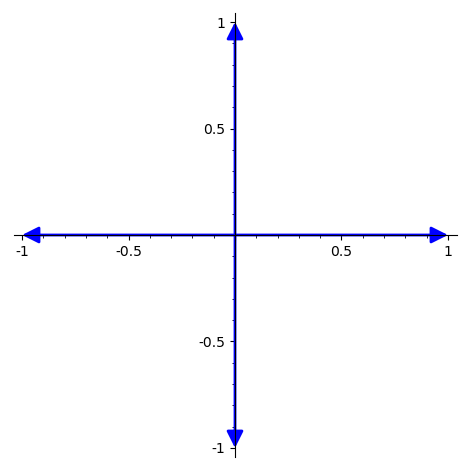

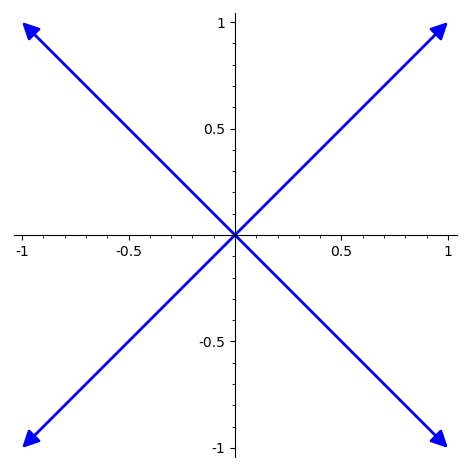

In [7]:
show(plot(ModelDict["FG-BMM-1.01"]))
show(plot(ModelDict["FG-BMM-1.02"]))

The method ``random_walk`` creates a valid random walk from the model. The method chooses at each step a valid step randomly where the probability for each step is directly proportional to its weight (i.e., if one step has a double weight, it has a double probability to be picked). This method offers several options for creating a valid walk in the model:

* The user has to give the length of the walk as the first argument.
* The user can choose the starting point of the walk with the optional argument ``start`` ($(0,0)$ by default).
* The user can only get the final point of the walk or also all the intermediate steps depending on the optional argument ``steps`` (``False`` by default, for the final point only).
* The user can change the restriction on the walk with the optional argument ``restriction``. It is set by default to 
  ``"quarter"`` (i.e., a walk in the quarter plane). It can also be set to ``"half"``, which restricts the walk to the upper 
  half plane or ``"none"``, which will remove all conditions on the walk.

In [8]:
m.random_walk(5, steps=True)

((0, 2), [(0, 1), (1, 0), (-1, -1), (0, 1), (0, 1)])

Since watching the walk as a list of tuples is a bit complicated, the method ``plot_walk`` allows the user to visualize a walk. The user can provide extra arguments to describe how the walk is plotted. We also have the method ``plot_random_walk``, that admits the same arguments as the method ``random_walk`` described above plus the optional arguments of the method ``plot_walk``.

True


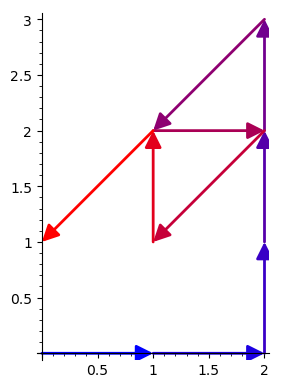

In [9]:
# A simple example with the model (N, E, SW)
walk = ((0,1), (E, E, N, N, N, SW, E, SW, N, SW))

print(m.walk_in_model(walk, restriction="quarter")) # The walk is valid for this model
m.plot_walk(walk)

False
True


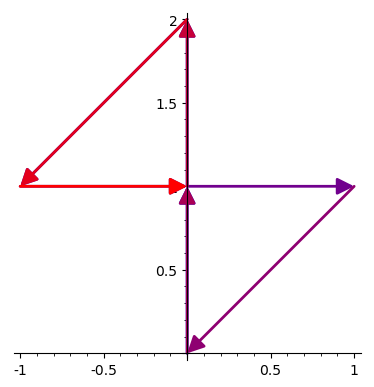

In [11]:
# A simple exaple changing the restrictions
walk = ((0,1), (N, N, SW, E, E, SW, N, N, SW, E))

print(m.walk_in_model(walk, restriction="quarter")) # The walk is not in the quarter plane
print(m.walk_in_model(walk, restriction="half")) # But on the half
m.plot_walk(walk)

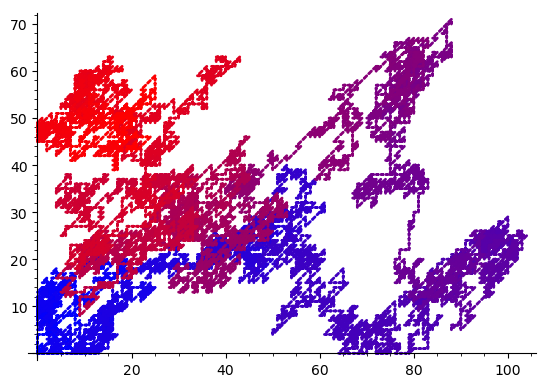

In [12]:
# A long example of the model
m.plot_random_walk(10000, arrowsize=0.001)

### 4. Geometric objects from the model

The user can directly access the algebraic objects that characterize a ``WalkModel`` such as the _step function_ (method ``step``) and the _kernel_ of the model (method ``kernel``):

In [13]:
m = WalkModel(N,NE,W,SW); m.step()

(x^2*y^2 + x*y^2 + y + 1)/(x*y)

In [14]:
WalkModel(N,NE,W,SW).kernel()

(-t)*x^2*y^2 + (-t)*x*y^2*z + x*y*z^2 + (-t)*y*z^3 + (-t)*z^4

Remark that the kernel that is returned has an extra homogenization variable, $z$. In the study of the enumerative generating function and the kernel functional equation, the curve defined by the kernel polynomial plays an important role:
$$E_t = \left\{(x:y:z) \in \pp^2(\cc(t))\ :\ K(x,y,z;t) = 0\right\}$$

This curve allows us to construct in many cases the algebraic or differential equation associated with the model. However, instead of studying this curve, it is even further interesting to study the same curve embedded into $\pp(\cc(t))\times \pp(\cc(t))$:
$$\overline{E_t} = \left{(x_0:x_1,y_0:y_1) \in \pp(\cc(t))\times \pp(\cc(t))\ :\ K(x_0,x_y,y_0,y_1;t) = 0\right\},$$
where now the kernel is homogenized independently w.r.t. $x = x_0/x_1$ and $y=y_0/y_1$.

More often than not, the curve described by $\overline{E_t}$ is elliptic (with genus $1$), namely when the curve is smooth. This means that we can compute a Weierstrass form (with coordinates $(u:v:w)$) such that the kernel equation transforms into
$$K(u,v,w) = v^2 - 4u^3 - g_2u - g_3.$$

The three different representations carry over to any geometric object related to the model.
The user is therefore allowed to ask for that particular representation in each method by using the optional argument ``model``:
* ``model='affine'`` or ``model='A'``: returns the representation in $(x:y:z)$.
* ``model='projective'`` or ``model='P'``: returns the representation in $(x_0:x_1,y_0:y_1)$.
* ``model='weierstrass'`` or ``model='W'``: returns the representation in $(u:v:w)$. This requires **Maple** to execute propertly.

In [15]:
NSEW = WalkModel(N,S,E,W);
NSEW.kernel('A') # affine case (showed before)

(-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2

In [16]:
NSEW.kernel('P') # doubly projective case

(-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x1^2*y0*y1 + (-t)*x0*x1*y1^2

In [17]:
NSEW.kernel('W')

4*t^2*u^3 + v^2*w + ((-4/3*t^4 + 4/3*t^2 - 1/12)/t^2)*u*w^2 + ((-8/27*t^6 - 5/9*t^4 + 1/9*t^2 - 1/216)/t^4)*w^3

There are several method that allows the user to recover the geometric information of the kernel:
* ``kernel``: computes the kernel polynomial in any of its forms.
* ``curve``: returns the Sage structure representing the curve $\overline{E_t}$ in any of its forms.
* ``map``: given two of the representations, returns a birational map from the curve $\overline{E_t}$ to itself in each of those representations.

In [18]:
NSEW.curve('P')

Closed subscheme of Product of projective spaces P^1 x P^1 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x1^2*y0*y1 + (-t)*x0*x1*y1^2

In [19]:
NSEW.curve('W')

Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  4*t^2*u^3 + v^2*w + ((-4/3*t^4 + 4/3*t^2 - 1/12)/t^2)*u*w^2 + ((-8/27*t^6 - 5/9*t^4 + 1/9*t^2 - 1/216)/t^4)*w^3

In [20]:
print(NSEW.map('P','A')) # from the doubly projective model to the simply projective model

Scheme morphism:
  From: Closed subscheme of Product of projective spaces P^1 x P^1 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x1^2*y0*y1 + (-t)*x0*x1*y1^2
  To:   Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2
  Defn: Defined by sending (x0 : x1 , y0 : y1) to 
        (x0*y1 : x1*y0 : x1*y1).


In [21]:
print(NSEW.map('A','P')) # from the simply projective model to the doubly projective model

Scheme morphism:
  From: Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2
  To:   Closed subscheme of Product of projective spaces P^1 x P^1 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x1^2*y0*y1 + (-t)*x0*x1*y1^2
  Defn: Defined on coordinates by sending (x : y : z) to
        (x : z , y : z)


In [22]:
# The method map return an object of type Map that can be composed:
print(NSEW.map('P','A') * NSEW.map('A','P'))
# The method ``is_identity`` allows to check if a map is the identity
is_identity(NSEW.map('P','A') * NSEW.map('A','P'))

Scheme endomorphism of Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2
  Defn: Defined on coordinates by sending (x : y : z) to
        (x*z : y*z : z^2)


True

There are more methods relating with maps within the curve $\overline{E_t}$:
* ``iota``: this method takes a variable ($x$ or $y$) and returns the map that, in the $(x:y:z)$ representation, moves one point to _the other point_ on $\overline{E_t}$ that has the same $x$ coordinate (or $y$ resprectively).
* ``tau``: returns the map $\iota_y \circ \iota_x$. This method is key to the study of the generating function $Q(x,y,t)$. In fact, if there is $n \in \nn$ with $\tau^n = id$, then the generating function is D-finite.
* The method ``order_morphism`` computes the order of a map. In the case of $\tau$, we also provide the method ``order_tau``.

In [23]:
print(NSEW.iota(x))
order_morphism(NSEW.iota(x))

Scheme endomorphism of Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2
  Defn: Defined on coordinates by sending (x : y : z) to
        (-x*y : -z^2 : -y*z)


2

In [24]:
print(NSEW.iota(x))
order_morphism(NSEW.iota(y))

Scheme endomorphism of Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2
  Defn: Defined on coordinates by sending (x : y : z) to
        (-x*y : -z^2 : -y*z)


2

In [25]:
print(NSEW.tau())
# Since the iotas has always order 2, checking that tau = iota_y iota_x is the same as tau iota_x iota_y = id
is_identity(NSEW.tau()* NSEW.iota(x) * NSEW.iota(y))

Scheme endomorphism of Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x^2*y + (-t)*x*y^2 + x*y*z + (-t)*x*z^2 + (-t)*y*z^2
  Defn: Defined on coordinates by sending (x : y : z) to
        (-y*z : -x*z : -x*y)


True

In [26]:
print(NSEW.tau('P'))
# The same three properties hold for the representation in (x_0:x_1,y_0:y_1)
print(order_morphism(NSEW.iota(x, 'P')))
print(order_morphism(NSEW.iota(y, 'P')))
is_identity(NSEW.tau('P')* NSEW.iota(x, 'P') * NSEW.iota(y,'P'))

Scheme endomorphism of Closed subscheme of Product of projective spaces P^1 x P^1 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x1^2*y0*y1 + (-t)*x0*x1*y1^2
  Defn: Defined by sending (x0 : x1 , y0 : y1) to 
        (-x1 : -x0 , -y1 : -y0).
2
2


True

In [27]:
print(NSEW.tau('W'))

Scheme endomorphism of Closed subscheme of Projective Space of dimension 2 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  4*t^2*u^3 + v^2*w + ((-4/3*t^4 + 4/3*t^2 - 1/12)/t^2)*u*w^2 + ((-8/27*t^6 - 5/9*t^4 + 1/9*t^2 - 1/216)/t^4)*w^3
  Defn: Defined on coordinates by sending (u : v : w) to
        ((-1/15471637197735803319257923584*t^12 + 1/123773097581886426554063388672*t^10)*u^2*v^16 + (1/241744331214621926863405056*t^16 + 1/53720962492138205969645568*t^14 + 35/3867909299433950829814480896*t^12 - 1/3867909299433950829814480896*t^10 - 5/30943274395471606638515847168*t^8)*u^2*v^15*w + (1/644651549905658471635746816*t^14 + 221/92829823186414819915547541504*t^12 + 1/5801863949150926244721721344*t^10 - 47/742638585491318559324380332032*t^8)*u*v^16*w + (1/3867909299433950829814480896*t^12 + 1/10314424798490535546171949056*t^10 - 1/61886548790943213277031694336*t^8)*v^17*w + (-5/483488662429243853726810112*t^18 - 23/120872165607310963431702528*t^16 

In [28]:
order_morphism(NSEW.tau('P')) # This model is D-finite

2

The package also allows the user to access some invariants of the curve. Some of this invariants characterize whether the curve is elliptic or not:
* Eisenstein invariants: these three invariants (named ``D``, ``E`` and ``F``) are computed from the coefficients of the discriminants of the kernel. Putting together the invariants ``D`` and ``E`` we can compute the invariant ``F`` that marks when the curve is elliptic or not (namely when the invariant is different or equal to zero).
* $g_2$ and $g_3$: then the curve is elliptic, these two invariants are the coefficients of the Weiertrass form of the curve.

In [29]:
NSEW.eisenstein('D')

4/3*t^4 - 4/3*t^2 + 1/12

In [30]:
NSEW.eisenstein('E')

8/27*t^6 + 5/9*t^4 - 1/9*t^2 + 1/216

In [31]:
NSEW.eisenstein('F')

16*t^10 - t^8

In [32]:
NSEW.g2()

4/3*t^4 - 4/3*t^2 + 1/12

In [33]:
NSEW.g3()

-8/27*t^6 - 5/9*t^4 + 1/9*t^2 - 1/216

### 5. Method with elliptic points

Whenever the curve $\overline{E_t}$ is elliptic, a group structure is naturally set over it. Two points can be geometrically added and substracted and there is a neutral point on the curve. The class ``WalkModel`` includes methods to compute and manipulate the group structure:
* ``add_P``: returns a map $\varphi_P$ such that $\varphi_P(Q) = P \oplus Q$.
* ``inv_P``: this method takes a point on the curve $P$ and returns $Q$ such that $P \oplus Q = O$.
* ``neutral_point``: returns the neutral point $O$ of the curve.

**WARNING:** all these method requires the computation of the Weiertrass normal form, i.e., the use of Maple.

In [34]:
print(NSEW.inv_P((1,0,0,1), 'P'))

(0 : 1 , 1 : 0)


In [35]:
print(NSEW.neutral_point('P'))

(0 : 1 , 0 : 1)


In [36]:
print(NSEW.add_P((1,0,0,1),'P'))

Scheme endomorphism of Closed subscheme of Product of projective spaces P^1 x P^1 over Fraction Field of Univariate Polynomial Ring in t over Rational Field defined by:
  (-t)*x0*x1*y0^2 + (-t)*x0^2*y0*y1 + x0*x1*y0*y1 + (-t)*x1^2*y0*y1 + (-t)*x0*x1*y1^2
  Defn: Defined by sending (x0 : x1 , y0 : y1) to 
        ((-64*t^7)*x0^3*y0^6*y1 + (-128*t^8 - 64*t^6)*x0^3*y0^5*y1^2 + (-64*t^5)*x0^3*y0^4*y1^3 + (512*t^8 + 64*t^6 - 64*t^4)*x0^3*y0^3*y1^4 + (-64*t^7)*x1^3*y0^3*y1^4 + (896*t^7 + 64*t^5 - 64*t^3)*x0^3*y0^2*y1^5 + (-128*t^8 - 256*t^6 + 128*t^4)*x1^3*y0^2*y1^5 + (-768*t^8 + 1344*t^6 - 64*t^2)*x0^3*y0*y1^6 + (1600*t^7 - 1920*t^5 + 128*t^3 + 64*t)*x0^2*x1*y0*y1^6 + (-384*t^8 + 896*t^6 + 768*t^4 - 256*t^2)*x0*x1^2*y0*y1^6 + (-384*t^7 - 640*t^5 + 192*t^3)*x1^3*y0*y1^6 + (-768*t^8 + 1344*t^6 - 64*t^2)*x0^2*x1*y1^7 + (-64*t^7 - 640*t^5 + 192*t^3)*x0*x1^2*y1^7 + 128*t^8*x1^3*y1^7 : (-64*t^7)*x0^3*y0^7 + (-128*t^8 - 64*t^6)*x0^3*y0^6*y1 + (-64*t^5)*x0^3*y0^5*y1^2 + (512*t^8 + 64*t^6 - 64*t^4)*

In [37]:
apply_map(NSEW.add_P((1,0,0,1),'P'), NSEW.inv_P((1,0,0,1), 'P')) == NSEW.neutral_point()


Exception ignored in: <function ExpectElement.__del__ at 0x7f401b54bae8>
Traceback (most recent call last):
  File "/home/anton/sage/local/lib/python3.7/site-packages/sage/interfaces/expect.py", line 1504, in __del__
    def __del__(self):
  File "src/cysignals/signals.pyx", line 320, in cysignals.signals.python_check_interrupt
KeyboardInterrupt: 


KeyboardInterrupt: 

### 6. Computation of poles and orbits

The results required for the classification of the generating function $Q(x,y,t)$ require the manipulation and analysis of rational functions over the curve $\overline{E_t}$. In particular, the class ``WalkModel`` offers several methods to do so:
* ``poles``: given a rational function, computes its poles over $\overline{E_t}$.
* ``orbits``: compute partial $\tau$-orbits of a given set of points. Given a bound $m$, this method computes the $\tau$-orbits for those points, approximated by splitting orbits at _gaps_ longer than $m$.

In [38]:
print(NSEW.poles(x1/x0, 'P')) # Computation of the poles
print(NSEW.orbits(NSEW.poles(x1/x0, 'P'))) # Checking these poles are $\tau$ independent

[(0 : 1 , 1 : 0), (0 : 1 , 0 : 1)]
([[(0 : 1 , 0 : 1)], [(0 : 1 , 1 : 0)]], [[], []])


Moreover, given an elliptic curve, there is a _unique_ holomorphic form (equivalent to $du/v$ in the Weierstrass form) that defines a partidular derivation of the rational functions through the curve. The package also allows the user to compute such derivatives (requiring the use of Maple).

The map $\tau$ and this derivative $\delta$ commute. In fact, one can study the D-transcendency of the generating function studying the telescoping property of a particular rational function. Such rational functions can be obtained with the method ``b`` of the class ``WalkModel``.

We say that a function $B$ $\tau$-$\delta$-telescopes if there is $L = c_n\delta_n + \ldots c_0$ were $\delta(c_i) = 0$ and a rational function $g$ such that:
$$L\cdot B = \tau(g) - g.$$

The computation of the operator $L$ and the function $g$ can be done with the method ``telescoping``:

In [39]:
try:
    NSEW.telescoping(NSEW.b(2)(x=x0/x1,y=y0/y1)) ## There is no telescoper
except ValueError:
    print("No telescoper for model %s" %NSEW)

ERROR:root:Function telescoping closed by an error: No telescoper: one orbit with pole has a unique point --> opol can not be zero


No telescoper for model Walk Model with steps: ((0, 1), 1), ((0, -1), 1), ((1, 0), 1), ((-1, 0), 1)


In [ ]:
model = WalkModel(NE, S, W)
L, g = model.telescoping(model.b(2)(x=x0/x1,y=y0/y1))
print(L) # differential operator
g # Certificate

We can now check with the method ``derivative`` and ``simplify_rational_variety`` that the desired identity holds. In this case:
$$\delta(b_2) = \tau(g) - g$$

In [56]:
tau = pullback(model.tau('P'))
db2 = model.derivative(model.b(2))(x=x0/x1,y=y0/y1)

to_be_zero = tau(g)-g -db2
print(to_be_zero == 0) # This is False
simplify_rational_variety(to_be_zero, model.curve('P')) # But after the simplification we get zero

False


0

### 7. Conclusion and database

The classification of the models can be done using the methods described above. This has been done with all the models in the variable ``AllModels`` and have been uploaded in the main web page of the repository:

https://discretewalks.gitlabpages.inria.fr/comb_walks/

This web page, as the repository, and code showed here, will be updated in the near future extending and completing the implementation. 

#### Now it is the time to experiment

We encourage people to test and use our code freely. If any errors, bugs or comments want to be made, please contact the authors by email (ajpastor@risc.uni-linz.ac.at) or leaving an issue in the [GitLab repository](https://gitlab.inria.fr/discretewalks/comb_walks).
